# Урок 8. Дисперсионный анализ. Логистическая регрессия

### 1. Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов. Даны значения роста в трех группах случайно выбранных спортсменов: Футболисты: 173, 175, 180, 178, 177, 185, 183, 182. Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180. Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170.

In [43]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [44]:
f = np.array([173, 175, 180, 178, 177, 185, 183, 182])
h = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180])
s = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])
n1 = len(f)
n2 = len(h)
n3 = len(s)
n = n1 + n2 + n3
print(n)
k = 3

28


In [45]:
f_mean = np.mean(f)
h_mean = np.mean(h)
s_mean = np.mean(s)
print(f_mean, h_mean, s_mean)

179.125 178.66666666666666 172.72727272727272


In [46]:
y = np.concatenate([f, h, s])
y

array([173, 175, 180, 178, 177, 185, 183, 182, 177, 179, 180, 188, 177,
       172, 171, 184, 180, 172, 173, 169, 177, 166, 180, 178, 177, 172,
       166, 170])

In [47]:
y_mean = np.mean(y)
y_mean

176.46428571428572

In [48]:
s2 = np.sum((y - y_mean)**2)
s2

830.9642857142854

In [49]:
s2_f = ((f_mean - y_mean)**2) * n1 + ((h_mean - y_mean)**2) * n2 + ((s_mean - y_mean)**2) * n3
s2_f

253.9074675324678

In [50]:
s2_r = np.sum((f - f_mean)**2) + np.sum((h - h_mean)**2) + np.sum((s - s_mean)**2)
s2_r

577.0568181818182

In [51]:
sigma2_g = s2 / (n - 1)
sigma2_g

30.776455026455015

In [52]:
sigma2_f = s2_f / (k - 1)
sigma2_f

126.9537337662339

In [53]:
sigma2_r = s2_r / (n - k)
sigma2_r

23.08227272727273

In [54]:
F_h = sigma2_f / sigma2_r
F_h

5.500053450812598

Определим уровень значимости a=0.05. k-1=2, n-k=25. Fкрит = 3.38. Fh > Fкрит => различие в росте между указанными группами спортсменов статистически значимо.

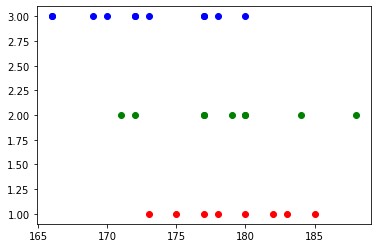

In [55]:
x1 = [1,]*len(f)
x2 = [2,]*len(h)
x3 = [3,]*len(s)
fig, ax = plt.subplots()
ax.scatter(f, x1, c='r')
ax.scatter(h, x2, c='g')
ax.scatter(s, x3, c='b')
plt.show()

In [56]:
stats.f_oneway(f,h,s)

F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698694)

Результаты вычислений подтверждаются.